# Entrenamiento del modelo con dataset: "TrainBot"

## 1. Preparación del dataset

In [2]:
import pandas as pd
from pandas import Series, DataFrame
from datetime import datetime
from dateutil import relativedelta

from matplotlib import pyplot as plt
import seaborn as sns

from time import time

In [3]:
df = pd.read_json('TrainBot.json')

In [5]:
df.columns

Index(['id', 'id_str', 'name', 'screen_name', 'location', 'url', 'description',
       'translator_type', 'protected', 'verified', 'followers_count',
       'friends_count', 'listed_count', 'favourites_count', 'statuses_count',
       'created_at', 'utc_offset', 'time_zone', 'geo_enabled', 'lang',
       'contributors_enabled', 'is_translator', 'profile_background_color',
       'profile_background_image_url', 'profile_background_image_url_https',
       'profile_background_tile', 'profile_link_color',
       'profile_sidebar_border_color', 'profile_sidebar_fill_color',
       'profile_text_color', 'profile_use_background_image',
       'profile_image_url', 'profile_image_url_https', 'profile_banner_url',
       'default_profile', 'default_profile_image', 'following',
       'follow_request_sent', 'notifications', 'isAutomated', 'source', 'id2',
       'text', 'tweet_created_at', 'geo', 'coordinates', 'place',
       'reply_count', 'retweet_count', 'favorite_count', 'favorited',
      

In [6]:
df['screen_name'].value_counts()

Love_McD           44
gusto_official     43
mr_the2nd          26
famima_reply       21
codedailybot       16
                   ..
i01961933           1
sunandribbon        1
IsEgL28lnQs8TYS     1
itumizumii          1
ManbikiGmen594      1
Name: screen_name, Length: 184860, dtype: int64

In [7]:
df.dtypes

id                                                  int64
id_str                                              int64
name                                               object
screen_name                                        object
location                                           object
url                                                object
description                                        object
translator_type                                    object
protected                                            bool
verified                                             bool
followers_count                                     int64
friends_count                                       int64
listed_count                                        int64
favourites_count                                    int64
statuses_count                                      int64
created_at                            datetime64[ns, UTC]
utc_offset                                        float64
time_zone     

In [8]:
df.isnull().sum()

id                                         0
id_str                                     0
name                                       0
screen_name                                0
location                               86116
url                                   157042
description                            27760
translator_type                            0
protected                                  0
verified                                   0
followers_count                            0
friends_count                              0
listed_count                               0
favourites_count                           0
statuses_count                             0
created_at                                 0
utc_offset                            210000
time_zone                             210000
geo_enabled                                0
lang                                       0
contributors_enabled                       0
is_translator                              0
profile_ba

In [4]:
##Eliminación de los valores que no se utilizarán 

df.drop(["contributors_enabled", "is_translator", "profile_background_color",
       "profile_background_image_url", "profile_background_image_url_https",
       "profile_background_tile", "profile_link_color",
       "profile_sidebar_border_color", "profile_sidebar_fill_color",
       "profile_text_color", "profile_use_background_image","following","follow_request_sent","notifications",
    "coordinates","geo","place","possibly_sensitive","utc_offset","location","url","description","time_zone",
         "profile_banner_url"], axis=1, inplace=True)

## 2. Selección de los atributos necesarios para realizar el modelo

In [5]:
# Atributos que intervienen en el modelo
features = ['followers_count', 
            'verified_transform',
            'friends_count', 
            'reply_count', 
            'retweet_count', 
            'isAutomated', 
            'source_transform',
            'statuses_count']


X = df[features].values
# Atributos objetivo, en definitiva, lo que se desea hallar
y = df['isBot'].values

## 3. Selección de conjunto de entrenamiento y subconjunto de test del modelo

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# Test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

In [14]:
# Creación del modelo kNN
from sklearn.tree import DecisionTreeClassifier


In [16]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import sklearn.tree

## 4. Creación del árbol de decisión y de la predicción

In [30]:
# Crear Decision Tree classifer 
clf = DecisionTreeClassifier(criterion='gini', splitter='best', 
                               max_depth=None, min_samples_split=2)
# Entrenamiento Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predicción de la respuesta sobre el subconjunto de test t
y_pred = clf.predict(X_test)

In [31]:

#Pedimos la matriz de confusión de las predicciones del grupo Test. La diagonal de esta matriz se lee: arriba a la izda True Negatives y abajo a la dcha True Positives.
sklearn.metrics.confusion_matrix(y_test,y_pred)
print(sklearn.metrics.confusion_matrix(y_test,y_pred))
#Sacamos el índice Accuracy Score, que resume la Matriz de Confusión y la cantidad de aciertos.
print(sklearn.metrics.accuracy_score(y_test, y_pred))

[[52491     2]
 [    5     2]]
0.9998666666666667


## 5. Guardado del entrenamiento del modelo para su posterior uso

In [32]:
import pickle
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))

## 6. ¿Cómo de acertado es el modelo para el subconjunto de test?

In [33]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9998666666666667


## 7. Creación del árbol de manera visual

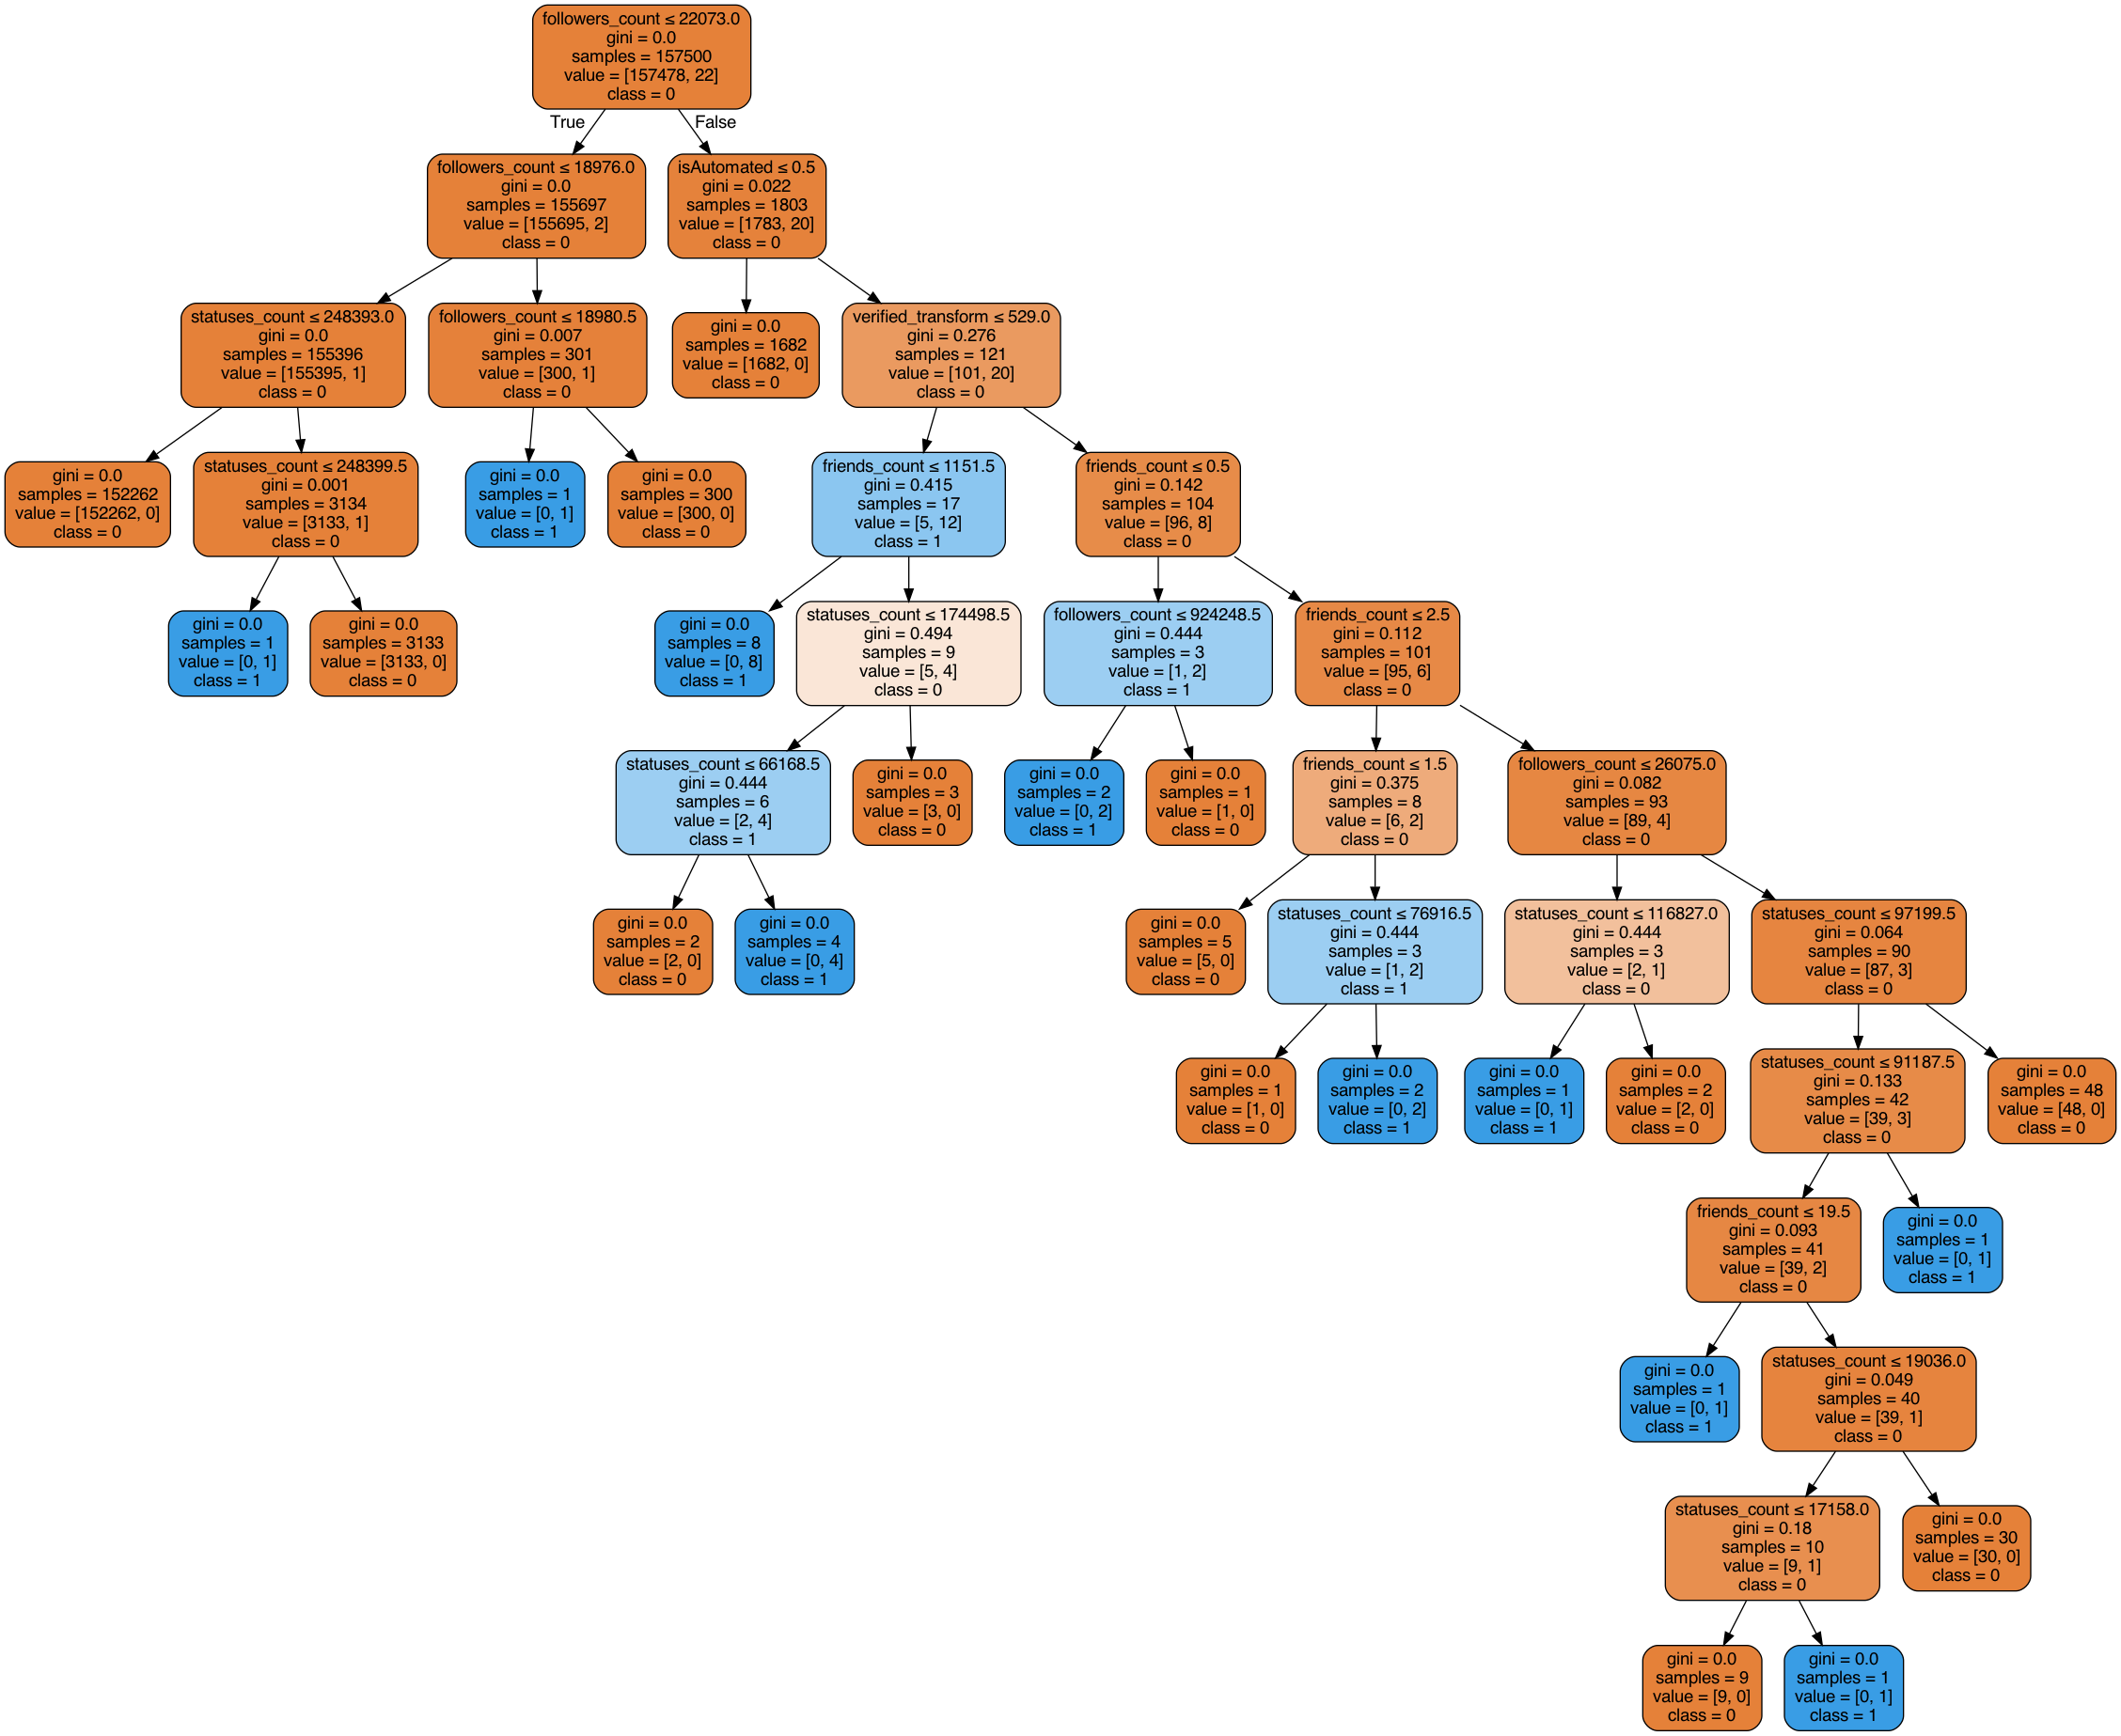

In [35]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decissionTreeGini.png')
Image(graph.create_png())

In [65]:
df.to_json('Twitter200.json')

In [66]:
df.to_csv('Twitter200.csv')

## 8. Modelado con entropia

In [9]:
model = DecisionTreeClassifier(criterion='entropy', splitter='best', 
                               max_depth=None, min_samples_split=2, 
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                               max_features=None, random_state=None, max_leaf_nodes=None,
                               min_impurity_decrease=0.0, min_impurity_split=None,
                               class_weight=None, presort='deprecated', ccp_alpha=0.0)

In [18]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [19]:

#Pedimos la matriz de confusión de las predicciones del grupo Test. La diagonal de esta matriz se lee: arriba a la izda True Negatives y abajo a la dcha True Positives.
sklearn.metrics.confusion_matrix(y_test,y_pred)
print(sklearn.metrics.confusion_matrix(y_test,y_pred))
#Sacamos el índice Accuracy Score, que resume la Matriz de Confusión y la cantidad de aciertos.
print(sklearn.metrics.accuracy_score(y_test, y_pred))

[[52492     1]
 [    5     2]]
0.9998857142857143


/Users/elena/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


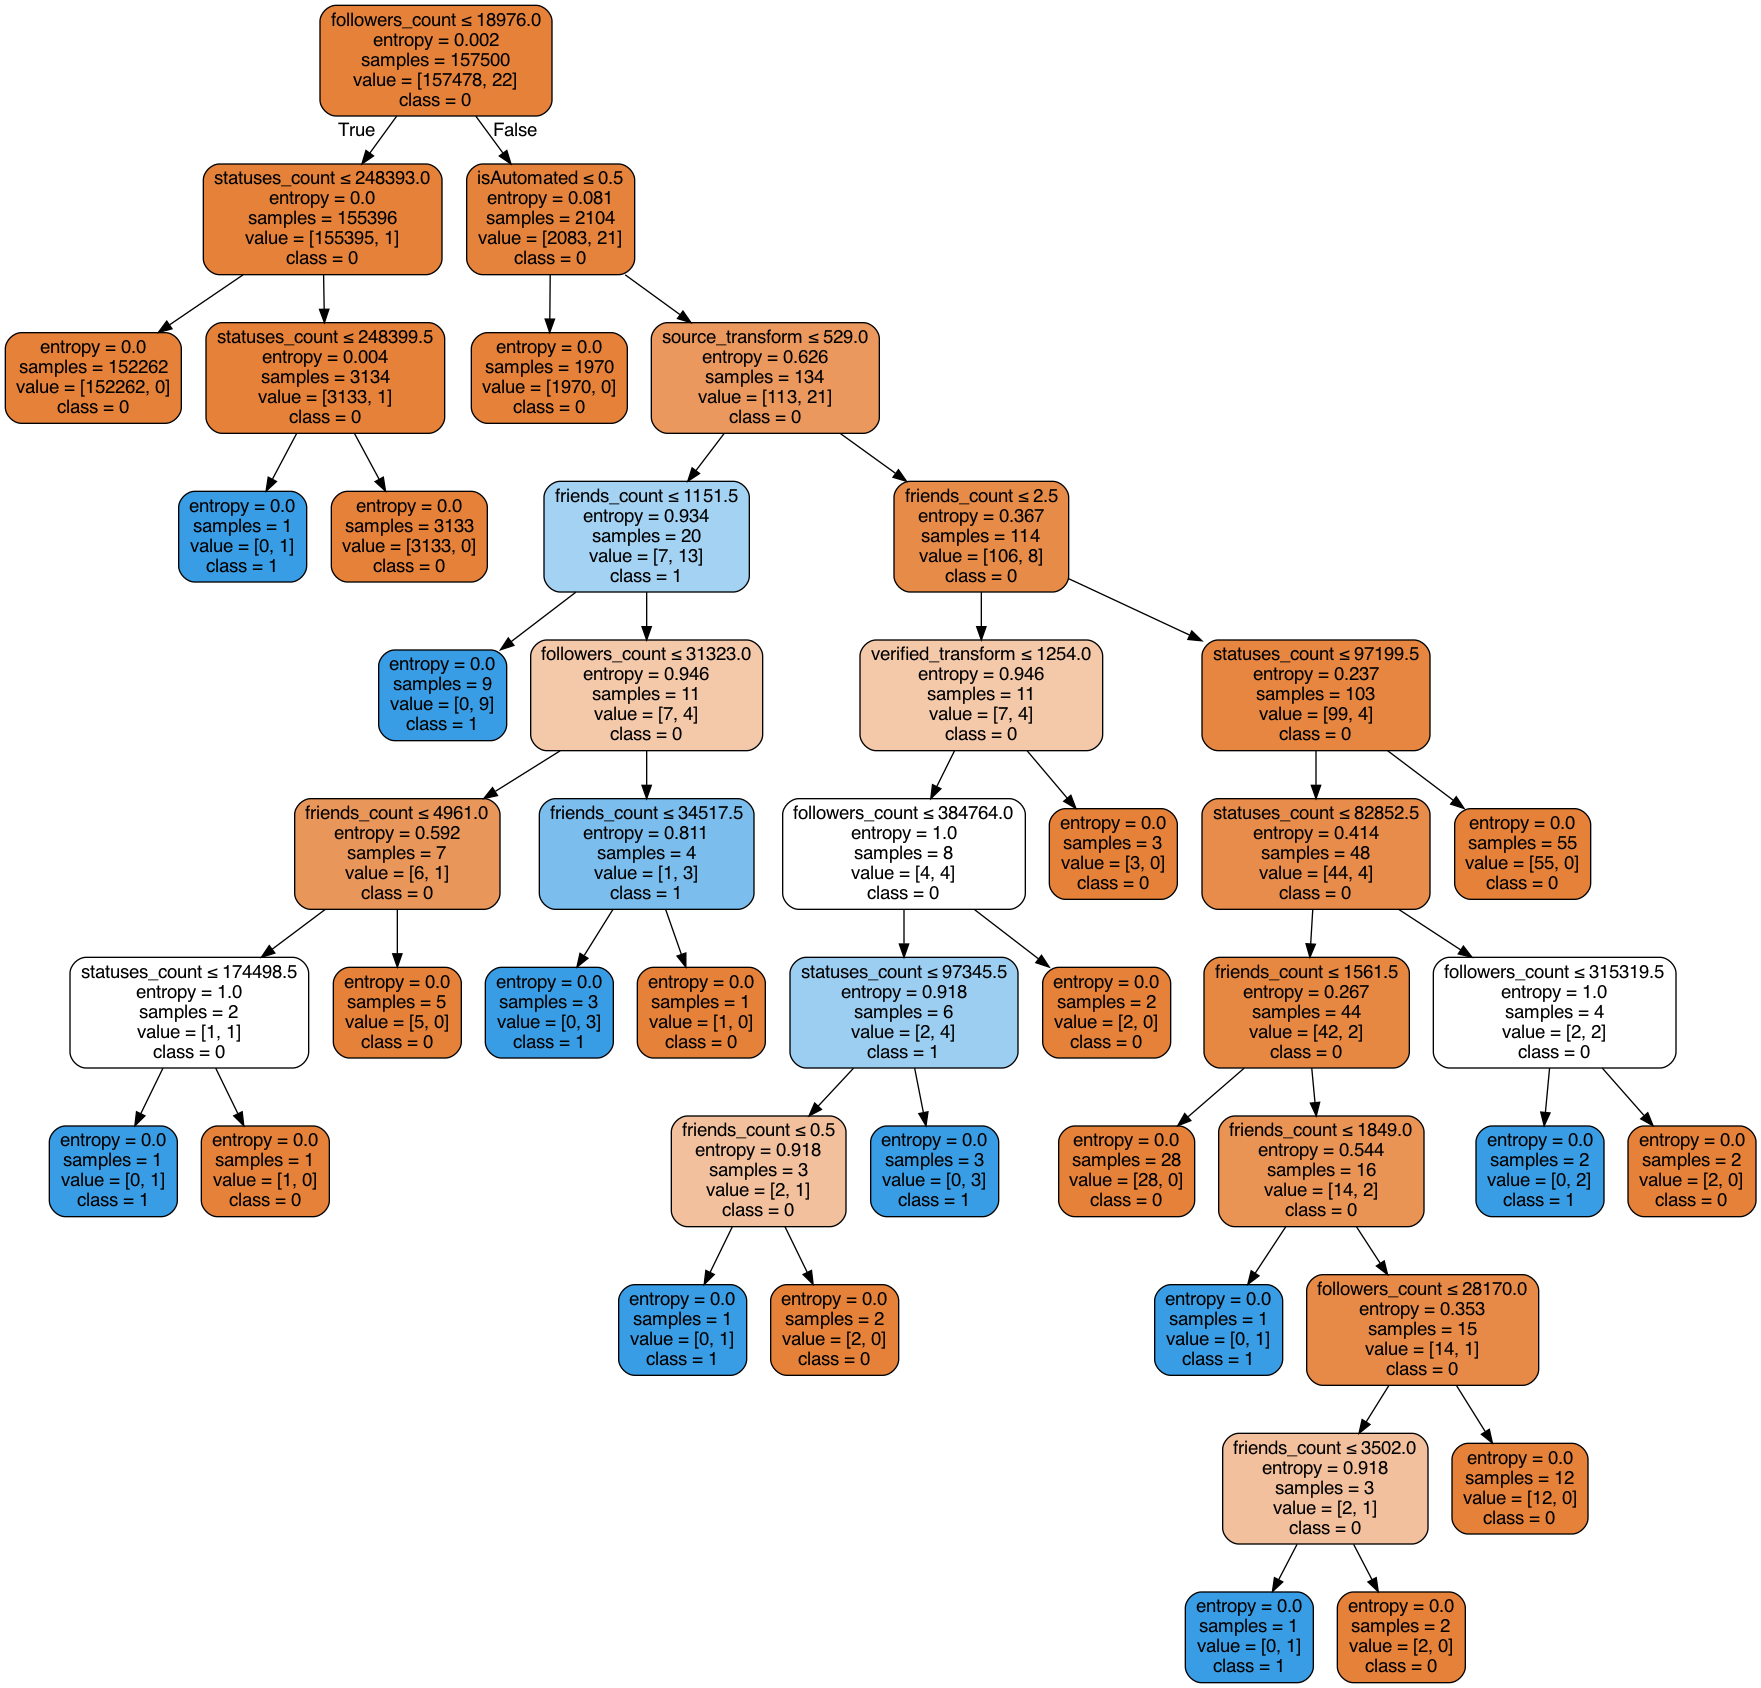

In [20]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decissionTree_2_Entropy.png')
Image(graph.create_png())

In [22]:
import pickle
# save the model to disk
filename = 'finalized_modelEntropy.sav'
pickle.dump(model, open(filename, 'wb'))